In [37]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import matplotlib.pyplot as plt
# conda install -c conda-forge mlxtend

In [2]:
books = pd.read_csv("C://data science//data sets//book.csv")

In [3]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
#Pre-Processing
#As the data is not in transaction formation We are using transaction Encoder
books_df = pd.get_dummies(books)

In [9]:
books_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [27]:
#Apriori Algorithm
frequent_itemsets = apriori(books_df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


<ipython-input-38-7ba9e43929ab>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])


Text(0, 0.5, 'support')

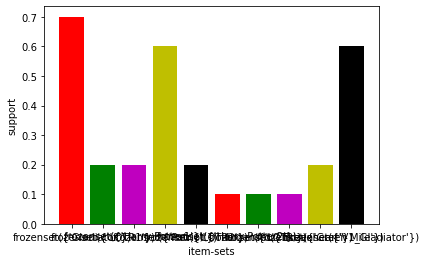

In [38]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')


In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [12]:
#An leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [13]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


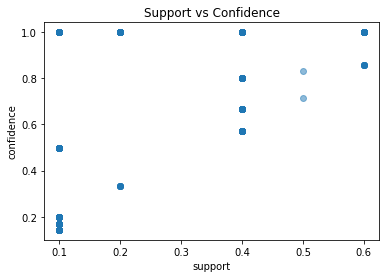

In [47]:
### Visualizing results
### 1. Support vs Confidence

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

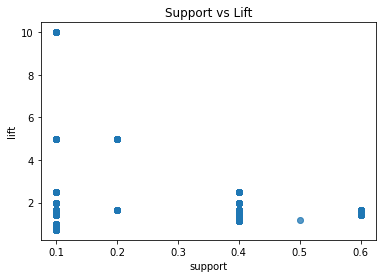

In [49]:
#### 2. Support vs Lift
plt.scatter(rules["support"], rules["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()

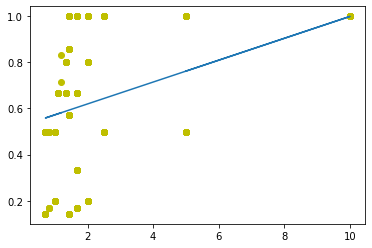

In [51]:
### Lift vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

In [39]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [40]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [41]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1474,"(V4_Green Mile, V2_LOTR1)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
14508,"(Harry Potter1, V1_Sixth Sense, V4_Green Mile,...",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
15258,"(V1_Sixth Sense, Green Mile, V4_Green Mile, V3...",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
13758,"(Harry Potter1, Green Mile, V4_Green Mile, LOTR2)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
916,"(V2_LOTR1, LOTR1)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
39012,"(Green Mile, Sixth Sense, Harry Potter1, LOTR2...",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
4816,"(Harry Potter1, Green Mile, V1_Sixth Sense)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
1480,"(V2_LOTR1, V3_Harry Potter1)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
29636,"(Green Mile, Harry Potter1, V1_Sixth Sense, V4...",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
24738,"(Green Mile, LOTR, Gladiator, V1_Sixth Sense, ...",(V2_LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf


In [53]:
## movies data set
movies = pd.read_csv("C://data science//data sets//my_movies.csv")

In [31]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [32]:
movies_df = pd.get_dummies(movies)
movies_df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [33]:
frequent_itemsets = apriori(movies_df, min_support=0.1, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, Sixth Sense, Harry Potter1, V1_Si..."
1393,0.1,"(Green Mile, Sixth Sense, V1_Sixth Sense, LOTR..."
1394,0.1,"(Green Mile, Sixth Sense, Harry Potter1, V1_Si..."
1395,0.1,"(Green Mile, Harry Potter1, V1_Sixth Sense, LO..."


In [42]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

<ipython-input-43-7ba9e43929ab>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])


Text(0, 0.5, 'support')

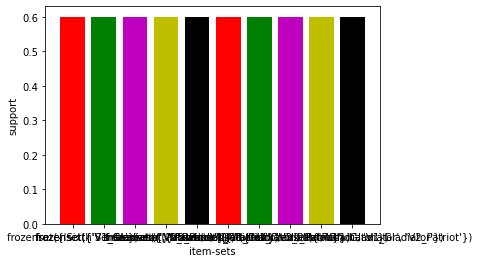

In [43]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [54]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
...,...,...,...,...,...,...,...,...,...
64247,(V4_Green Mile),"(Green Mile, Sixth Sense, Harry Potter1, V1_Si...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64248,(V3_Harry Potter1),"(Green Mile, Sixth Sense, Harry Potter1, V1_Si...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V5_LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, V1_Si...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(V2_LOTR1),"(Green Mile, Sixth Sense, Harry Potter1, V1_Si...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [35]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Green Mile, V3_Harry Potter1, LOTR2, V5_LOTR2)","(Harry Potter1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33436,"(V4_Green Mile, V2_LOTR1, V5_LOTR2)","(Harry Potter1, Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(V4_Green Mile, Sixth Sense, V5_LOTR2)","(Harry Potter1, V2_LOTR1, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V4_Green Mile, Sixth Sense, V2_LOTR1)","(Harry Potter1, LOTR1, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V4_Green Mile, Sixth Sense, LOTR1)","(Harry Potter1, V2_LOTR1, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V2_LOTR1, Sixth Sense, V5_LOTR2)","(Harry Potter1, V4_Green Mile, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(Sixth Sense, LOTR1, V5_LOTR2)","(Harry Potter1, V4_Green Mile, LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V2_LOTR1, Sixth Sense, LOTR1)","(Harry Potter1, V4_Green Mile, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(Harry Potter1, V4_Green Mile, LOTR2)","(V2_LOTR1, Sixth Sense, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Harry Potter1, LOTR2, V5_LOTR2)","(V4_Green Mile, Sixth Sense, V2_LOTR1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [36]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V4_Green Mile),"(Green Mile, Sixth Sense, Harry Potter1, V1_Si...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V3_Harry Potter1),"(Green Mile, Sixth Sense, Harry Potter1, V1_Si...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V5_LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, V1_Si...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(V2_LOTR1),"(Green Mile, Sixth Sense, Harry Potter1, V1_Si...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


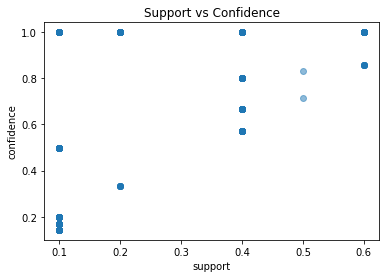

In [55]:
### Visualizing results
### 1. Support vs Confidence

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

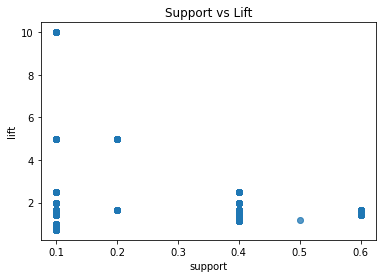

In [56]:
#### 2. Support vs Lift
plt.scatter(rules["support"], rules["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()

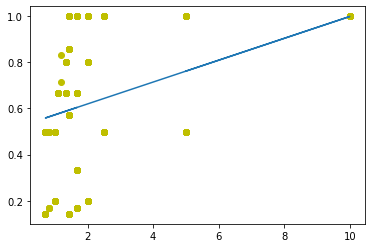

In [57]:
### Lift vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

In [44]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [45]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [46]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1474,"(V4_Green Mile, V2_LOTR1)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
14508,"(Harry Potter1, V1_Sixth Sense, V4_Green Mile,...",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
15258,"(V1_Sixth Sense, Green Mile, V4_Green Mile, V3...",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
13758,"(Harry Potter1, Green Mile, V4_Green Mile, LOTR2)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
916,"(V2_LOTR1, LOTR1)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
39012,"(Green Mile, Sixth Sense, Harry Potter1, LOTR2...",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
4816,"(Harry Potter1, Green Mile, V1_Sixth Sense)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
1480,"(V2_LOTR1, V3_Harry Potter1)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
29636,"(Green Mile, Harry Potter1, V1_Sixth Sense, V4...",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
24738,"(Green Mile, LOTR, Gladiator, V1_Sixth Sense, ...",(V2_LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
